<table style="border: none" align="left">
   <tr style="border: none">
      <th style="border: none"><font face="verdana" size="5" color="black"><b>Use Core ML model to predict Boston house prices</b></th>
      <th style="border: none"><img src="https://github.com/pmservice/customer-satisfaction-prediction/blob/master/app/static/images/ml_icon_gray.png?raw=true" alt="Watson Machine Learning icon" height="40" width="40"></th>
   </tr>
   <tr style="border: none">
       <th style="border: none"><img src="https://github.com/pmservice/wml-sample-models/raw/master/scikit-learn/boston/images/boston_houseprice_banner.png" width="600" alt="Icon"> </th>
   </tr>
</table>

This notebook demonstrates how to perform regression analysis using scikit-learn and the watson-machine-learning-client package.

Some familiarity with Python is helpful. This notebook is compatible with Python 3.6.

You will use the sample data set, **sklearn.datasets.load_boston** which is available in scikit-learn, to predict house prices.

## Learning goals

In this notebook, you will learn how to:

-  Load a sample data set from ``scikit-learn``
-  Explore data
-  Prepare data for training and evaluation
-  Create a scikit-learn pipeline
-  Train and evaluate a model
-  Store a model in the Watson Machine Learning (WML) repository
-  Deploy a model as Core ML


## Contents

1.	[Set up the environment](#setup)
2.	[Load and explore data](#load)
3.	[Build a scikit-learn linear regression model](#model)
4.	[Set up the WML instance and save the model in the WML repository](#persistence)
5.	[Deploy the model via Core ML](#scoring)
6.	[Summary and next steps](#summary)

<a id="setup"></a>
## 1. Set up the environment

Before running the code in this notebook, please make sure you have the following requirements:

-  Create a <a href="https://cloud.ibm.com/catalog/services/machine-learning" target="_blank" rel="noopener no referrer">Watson Machine Learning (WML) Service</a> instance (a free plan is offered and information about how to create the instance can be found <a href="https://dataplatform.ibm.com/docs/content/analyze-data/wml-setup.html" target="_blank" rel="noopener no referrer">here</a>)

-  Local python environment configurations:
  + Python 3.6
  + scikit-learn
  + watson-machine-learning-client
  + pixiedust

**Note:** `watson-machine-learning-client` documentation can be found <a href="http://wml-api-pyclient.mybluemix.net/" target="_blank" rel="noopener no referrer">here</a>.  
**Tip**: Run the cells below to install required packages from <a href="https://pypi.python.org/pypi" target="_blank" rel="noopener no referrer">PyPI</a>.

In [1]:
!rm -rf $PIP_BUILD/watson-machine-learning-client

In [ ]:
!pip install --upgrade watson-machine-learning-client

`pixiedust` is an open-source Python helper library that works as an add-on to Jupyter notebooks to improve the user experience of working with data.  
`pixiedust` documentation/code can be found <a href="https://github.com/pixiedust/pixiedust" target="_blank" rel="noopener no referrer">here</a>.  

In [ ]:
!pip install --upgrade pixiedust

<a id="load"></a>
## 2. Load and explore data

The sample data set contains boston house prices. The data set can be found <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/housing/" target="_blank" rel="noopener no referrer">here</a>.

In this section, you will learn how to:
- [2.1 Explore Data](#dataset)  
- [2.2 Check the correlations between predictors and the target](#corr)

### 2.1 Explore data<a id="dataset"></a>

In this subsection, you will perform exploratory data analysis of the boston house prices data set.

In [4]:
!pip install --upgrade scikit-learn==0.19.1

Requirement already up-to-date: scikit-learn==0.19.1 in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.19.1)


In [5]:
import sklearn
from sklearn import datasets
import pandas as pd

boston_data = datasets.load_boston()

Let's check the names of the predictors.

In [6]:
print(boston_data.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


**Tip:** Run `print(boston_data.DESCR)` to view a detailed description of the data set.

In [7]:
print(boston_data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Create a pandas DataFrame and display some descriptive statistics.

In [8]:
boston_pd = pd.DataFrame(boston_data.data)
boston_pd.columns = boston_data.feature_names
boston_pd['PRICE'] = boston_data.target

Import ``pixiedust``.

In [9]:
import pixiedust

Pixiedust database opened successfully


You can run the following method if you don't want ``pixiedust`` collecting user statistics.

In [10]:
pixiedust.optOut()

Pixiedust will not collect anonymous install statistics.


In this notebook, ``pixiedust`` will only be used as a dataframe viewer. However, ``pixiedust`` can also be used as a data visualization tool. You can find the details of the visualization functionality of ``pixiedust`` <a href="https://pixiedust.github.io/pixiedust/displayapi.html" target="_blank" rel="noopener no referrer">here</a>.

In [ ]:
display(boston_pd)

CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0.03871,52.5,5.32,0.0,0.405,6.209,31.3,7.3172,6.0,293.0,16.6,396.9,7.14,23.2
0.04297,52.5,5.32,0.0,0.405,6.565,22.9,7.3172,6.0,293.0,16.6,371.72,9.51,24.8
2.15505,0.0,19.58,0.0,0.871,5.628,100.0,1.5166,5.0,403.0,14.7,169.27,16.65,15.6
0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.932,8.0,284.0,19.7,396.9,9.22,19.6
0.09103,0.0,2.46,0.0,0.488,7.155,92.2,2.7006,3.0,193.0,17.8,394.12,4.82,37.9
0.26363,0.0,8.56,0.0,0.52,6.229,91.2,2.5451,5.0,384.0,20.9,391.23,15.55,19.4
0.03548,80.0,3.64,0.0,0.392,5.876,19.1,9.2203,1.0,315.0,16.4,395.18,9.25,20.9
24.8017,0.0,18.1,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.9,19.77,8.3
2.01019,0.0,19.58,0.0,0.605,7.929,96.2,2.0459,5.0,403.0,14.7,369.3,3.7,50.0
0.20608,22.0,5.86,0.0,0.431,5.593,76.5,7.9549,7.0,330.0,19.1,372.49,12.5,17.6


The describe method generates summary statistics of numerical predictors.

In [12]:
boston_pd.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 2.2 Check the correlations between predictors and the target <a id="corr"></a>

In this subsection, you will check the linear correlations between predictors and target by plotting a scatterplot matrix and a heatmap. You need the following packages in order to plot the scatterplot matrix and the heatmap:
* ``matplotlib``
* ``seaborn``

Pearson-type correlations - linear correlations - are excessively affected by outliers, unequal predictors, non-normality, and non-linearities. Hence, when plotting the correlation matrix, it's better to plot the scatterplot matrix first to check the outliers and then plot the heatmap of the correlation matrix.

First, let's plot the scatterplot matrix.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
sns.set(style='ticks')

/opt/conda/envs/Python36/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/conda/envs/Python36/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/nonparametric/bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
/opt/conda/envs/Python36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/no

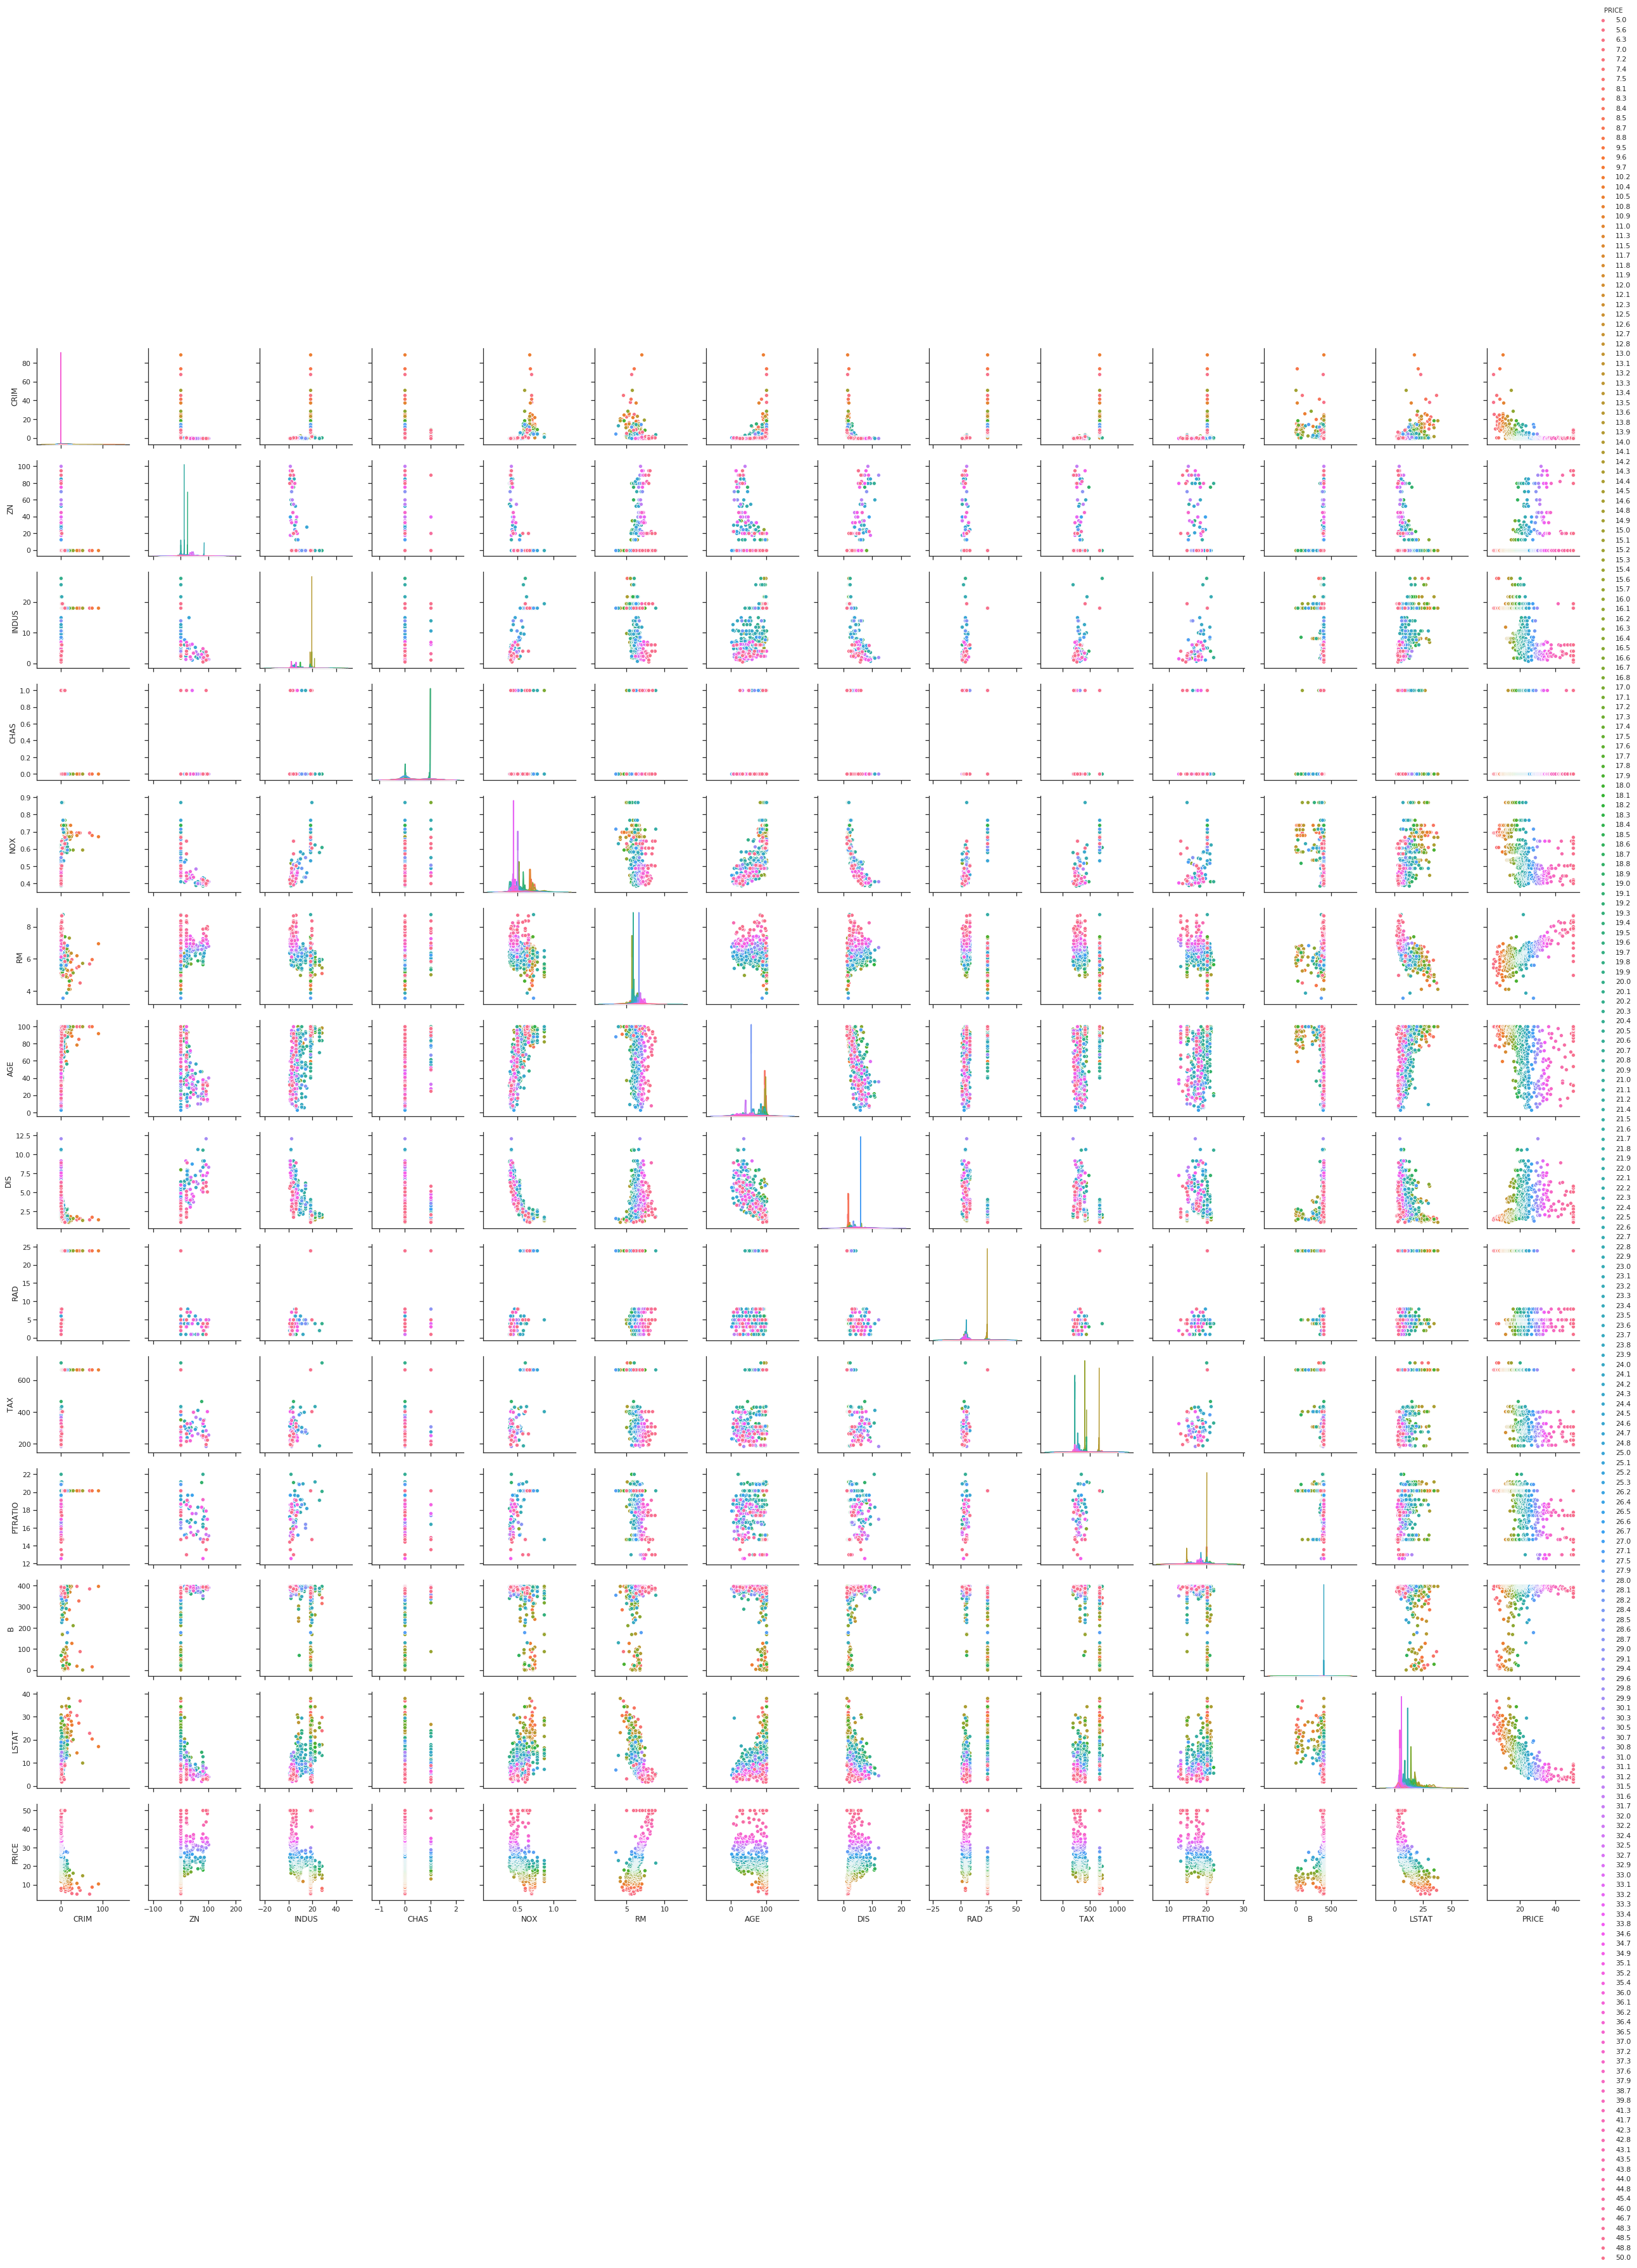

In [15]:
sns.pairplot(boston_pd, hue='PRICE')

Second, the heatmap of correlation matrix.

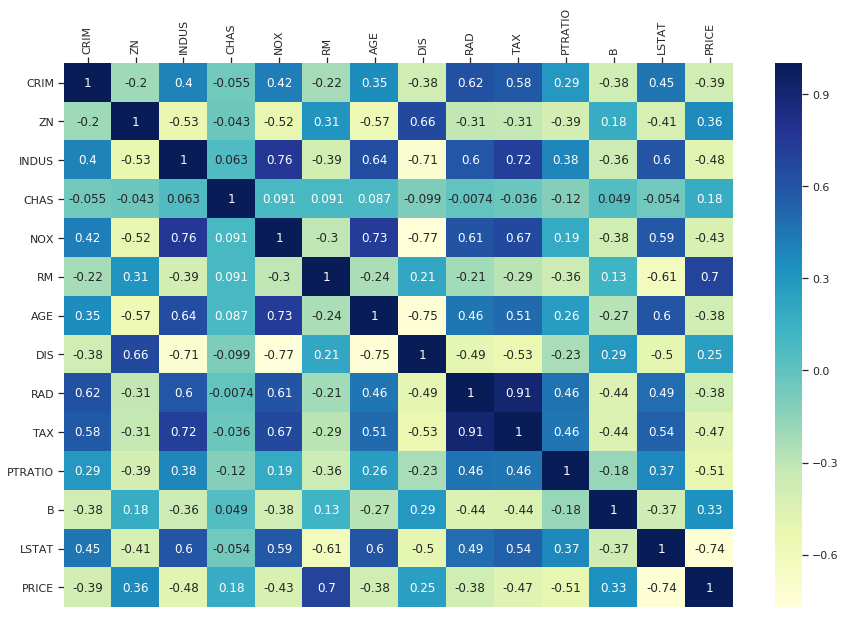

In [16]:
plt.subplots(figsize=(15,10))
hm = sns.heatmap(boston_pd.corr(), annot=True, cmap='YlGnBu')
hm.set_xticklabels(hm.get_xticklabels(), rotation=90)
hm.xaxis.set_ticks_position('top')

From both plots, you can see that the predictor ``RM`` has strong correlation with the target ``PRICE``.

<a id="model"></a>
## 3. Build a scikit-learn linear regression model

In this section, you will learn how to:
- [3.1 Split data](#prep)
- [3.2 Create a scikit-learn pipeline](#pipe)
- [3.3 Train the model](#train)

### 3.1 Split data<a id="prep"></a>

In this subsection, you will split the data set into: 
- Train data set
- Test data set

In [17]:
# Split the data into two data sets.
from sklearn.model_selection import train_test_split

X = boston_pd.drop('PRICE', axis = 1)
y = boston_pd['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)

print('Number of training records: ' + str(X_train.shape[0]))
print('Number of training records: ' + str(X_test.shape[0]))

Number of training records: 339
Number of training records: 167


Your data has been successfully split into two data sets: 

-  The train data set, which is the largest group, is used for training.
-  The test data set will be used for model evaluation and is used to test the model.

### 3.2 Create a scikit-learn pipeline<a id="pipe"></a>

In this subsection, you will create a scikit-learn pipeline.

First, import the scikit-learn machine learning packages that are needed in the subsequent steps.

In [18]:
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Standardize the features by removing the mean and by scaling to unit variance.

In [19]:
scaler = preprocessing.StandardScaler()

Next, define the regressor you want to use. This notebook uses the Linear Regression model.

In [20]:
lr = LinearRegression()

Build the pipeline. A pipeline consists of a transformer (Standard Scaler) and an estimator (Linear Regression model).

In [21]:
pipeline = Pipeline([('scaler', scaler), ('lr', lr)])

### 3.3 Train the model<a id="train"></a>

Now, you can use the **pipeline** and **train data** you defined previously to train your SVM model.

In [22]:
model = pipeline.fit(X_train, y_train)

Check the model quality.

In [23]:
y_pred = model.predict(X_test)
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)

print('MSE: ' + str(mse))

MSE: 28.541367275618256


Plot the scatter plot of prices vs. predicted prices.

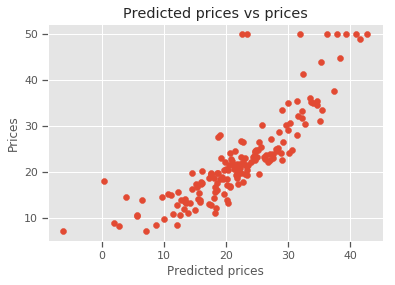

In [24]:
plt.style.use('ggplot')
plt.title('Predicted prices vs prices')
plt.ylabel('Prices')
plt.xlabel('Predicted prices')
plot = plt.scatter(y_pred, y_test)

**Note:** You can tune your model to achieve better accuracy. To keep this example simple, the tuning section is omitted.

<a id="persistence"></a>
## 4. Set up the WML instance and save the model in the WML repository

In this section, you will learn how to use the common Python client to manage your model in the WML repository.

- [4.1 Set up your WML instance](#work)
- [4.2 Save the model to the WML repository](#save)

**Tip**: You can find more information about the watson-machine-learning-client <a href="https://wml-api-pyclient.mybluemix.net" target="_blank" rel="noopener no referrer">here</a>.

### 4.1 Set up your WML instance<a id="work"></a>

First, you must import the client libraries.

In [25]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

Authenticate to the Watson Machine Learning service on IBM Cloud.

**Tip**: Authentication information (your credentials) can be found in the <a href="https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/ml-get-wml-credentials.html" target="_blank" rel="noopener no referrer">Service credentials</a> tab of the service instance that you created on the IBM Cloud. <BR>If you cannot find the **instance_id** field in **Service Credentials**, click **New credential (+)** to generate new authentication information. 

**Action**: Enter your Watson Machine Learning service instance credentials here.


In [26]:
wml_credentials = {
    'username': '***',
    'password': '***',
    'instance_id': '***',
    'url': 'https://ibm-watson-ml.mybluemix.net'
}

#### Create the API client. 

In [28]:
client = WatsonMachineLearningAPIClient(wml_credentials)

### 4.2 Save the model in the WML repository<a id="save"></a>

Define the model name, author name and email.

In [29]:
published_model = client.repository.store_model(model=model, meta_props={'name':'Boston house price prediction'}, training_data=X_train, training_target=y_train)

In [30]:
model_uid = client.repository.get_model_uid(published_model)

#### Get information about all of the models in the WML repository.

In [31]:
models_details = client.repository.list_models()

------------------------------------  -------------------------------------------  ------------------------  -----------------
GUID                                  NAME                                         CREATED                   FRAMEWORK
0a6e97eb-46ed-4760-b99f-b71971dfb475  Boston house price prediction                2019-07-12T22:57:51.116Z  scikit-learn-0.19
95f32571-d592-4a8a-8f03-398980225a26  Boston house price prediction                2019-07-12T21:38:42.827Z  scikit-learn-0.19
f4151059-39ec-4b78-999a-42bd731d6c52  WML Product Line Prediction Model            2019-07-10T22:30:00.696Z  mllib-2.3
ced711d3-eb7f-489a-a99d-3f3a18d6ea7b  WML Product Line Prediction Model            2019-07-10T17:35:25.935Z  mllib-2.3
5dbf06c3-8325-4cee-957b-1dd7b7769087  WML Product Line Prediction Model            2019-07-10T17:31:18.644Z  mllib-2.3
ad24c140-f97a-49f2-b02c-f8ce44a58c27  Custom ARIMA estimator for sklearn pipeline  2019-07-03T01:04:33.998Z  scikit-learn-0.19
fc5462c8-7eb9-4d

<a id="scoring"></a>
## 5. Deploy the model via Core ML

In this section, you will learn how to use the WML client to create a **virtual** deployment via the `Core ML`. You will also learn how to use `download_url` to download a Core ML model for your <a href="https://developer.apple.com/xcode/" target="_blank" rel="noopener no referrer">Xcode</a> project.

- [5.1 Create a virtual deployment for the model](#create)
- [5.2 Download the Core ML file from the deployment](#getdeploy)
- [5.3 Test the CoreML model](#testcoreML)

### 5.1 Create a virtual deployment for the model<a id="create"></a>

In [32]:
deployment_details = client.deployments.create(model_uid, 'Virtual deployment of Boston model', deployment_type='virtual')



#######################################################################################

Synchronous deployment creation for uid: '0a6e97eb-46ed-4760-b99f-b71971dfb475' started

#######################################################################################


DEPLOY_IN_PROGRESS.
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='29b85aff-bba4-409c-9036-6f6e0ecadc1f'
------------------------------------------------------------------------------------------------




Now, you can define and print the download endpoint. You can use this endpoint to download the Core ML model.

### 5.2 Download the `Core ML` file from the deployment<a id="getdeploy"></a>

In [34]:
client.deployments.list()

------------------------------------  -------------------------------------------------------  -------  ------------------  ------------------------  -----------------  -------------
GUID                                  NAME                                                     TYPE     STATE               CREATED                   FRAMEWORK          ARTIFACT TYPE
29b85aff-bba4-409c-9036-6f6e0ecadc1f  Virtual deployment of Boston model                       virtual  DEPLOY_SUCCESS      2019-07-12T22:57:54.466Z  scikit-learn-0.19  model
9a290bf5-d6cf-47f1-b28b-b907d32a3d3f  Virtual deployment of Boston model                       virtual  DEPLOY_SUCCESS      2019-07-12T21:38:58.898Z  scikit-learn-0.19  model
00a20e0e-4316-4cfc-87f3-83e430134b59  SpaCy model python function deployment                   online   DEPLOY_FAILURE      2019-07-12T21:34:29.927Z  n/a                function
0896bcbb-324c-483e-900a-2056c9777720  Online scoring                                           online   DE

#### Download the virtual deployment content: Core ML model.

In [35]:
deployment_uid = client.deployments.get_uid(deployment_details)

deployment_content = client.deployments.download(deployment_uid)



----------------------------------------------------------
Successfully downloaded deployment file: mlartifact.tar.gz
----------------------------------------------------------




Use the code in the cell below to create the download link.

In [36]:
from watson_machine_learning_client.utils import create_download_link

create_download_link(deployment_content)

**Note:** You can use <a href="https://developer.apple.com/xcode/" target="_blank" rel="noopener no referrer">Xcode</a> to preview the model's metadata (after unzipping). 

### 5.3 Test the `Core ML` model<a id="testcoreML"></a>

Use the following steps to run a test against the downloaded Core ML model.

In [ ]:
!pip install --upgrade coremltools

Use the ``coremltools`` to load the model and check some basic metadata.

First, extract the model.

In [38]:
from watson_machine_learning_client.utils import extract_mlmodel_from_archive

extracted_model_path = extract_mlmodel_from_archive('mlartifact.tar.gz', model_uid)

Load the model and check the description.

In [39]:
import coremltools

loaded_model = coremltools.models.MLModel(extracted_model_path)
print(loaded_model.short_description)

2019-07-12 22:58:08,147 - root - WARNING - TensorFlow version 1.13.1 detected. Last version known to be fully compatible is 1.12.0 .


Description of deployment


The model looks good and can be used on your iPhone now.

<a id="summary"></a>
## 6. Summary and next steps     

You successfully completed this notebook! 
 
You learned how to use scikit-learn to create a Core ML model.

If you are interested in sample swift application (for iOS), please visit <a href="https://github.com/pmservice/go-digits" target="_blank" rel="noopener no referrer">here</a>. 

Check out our <a href="https://dataplatform.ibm.com/docs/content/analyze-data/wml-setup.html" target="_blank" rel="noopener noreferrer">Online Documentation</a> for more samples, tutorials, documentation, how-tos, and blog posts. 

### Author

**Lukasz Cmielowski**, Ph.D., is a Lead Data Scientist at IBM developing enterprise-level applications that substantially increases clients' ability to turn data into actionable knowledge.  
**Jihyoung Kim**, Ph.D., is a Data Scientist at IBM who strives to make data science easy for everyone through Watson Studio.

Copyright © 2017-2019 IBM. This notebook and its source code are released under the terms of the MIT License.

<div style="background:#F5F7FA; height:110px; padding: 2em; font-size:14px;">
<span style="font-size:18px;color:#152935;">Love this notebook? </span>
<span style="font-size:15px;color:#152935;float:right;margin-right:40px;">Don't have an account yet?</span><br>
<span style="color:#5A6872;">Share it with your colleagues and help them discover the power of Watson Studio!</span>
<span style="border: 1px solid #3d70b2;padding:8px;float:right;margin-right:40px; color:#3d70b2;"><a href="https://ibm.co/wsnotebooks" target="_blank" style="color: #3d70b2;text-decoration: none;">Sign Up</a></span><br>
</div>